In [1]:
import pandas as pd
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fire/CDI_Based/Intensity/CSV/Gray.csv',index_col=0)
display(d.head())

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,3437145,3247680,2615790,2092020,1896435,1621545,1546575,1521075,1414485,1340535,...,2296275,2399040,2520675,3783435,3055665,1784745,1490730,1828860,2334270,0
1,3431790,2536995,2182800,2040510,1982115,1975230,1797750,1659540,2023935,2126700,...,3114570,2673165,2105790,3049035,3853560,2392410,2021640,1997160,1955085,0
2,7563300,6824565,6373725,6701145,7166775,6316350,6275550,6363015,6690690,7725480,...,7129290,7490370,8164590,8340285,8245425,7314675,7006380,7273875,7961610,0
3,2786385,2996250,3745950,4358205,3069180,3141600,3901500,3210705,3222690,3863760,...,11985,11985,11985,10200,219300,119850,23970,25755,26775,0
4,5978220,4477545,3604425,3034755,4250595,4841940,3912975,5929005,5985105,5173185,...,7589565,6146010,6505560,8803365,3973665,4058070,6000405,3292560,2760885,0


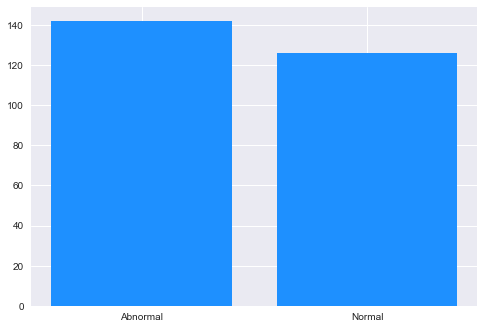

In [2]:

import warnings
warnings.filterwarnings("ignore")
 
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix
from sklearn import metrics
num_normal = np.sum(d['Class'] == 0)
num_abnormal = np.sum(d['Class'] == 1)
plt.bar(['Abnormal', 'Normal'], [num_abnormal, num_normal], color='dodgerblue')
plt.show()

In [3]:
# 提取负样本，并且按照8:2切成训练集和测试集
data = d
mask = (data['Class'] == 0)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)

X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)


X_fraud = data[~mask].drop(['Class'], axis=1)



In [4]:

# 设置Autoencoder的参数
# 隐藏层节点数分别为16，8，8，16
# epoch为50，batch size为32
input_dim = X_train.shape[1]
encoding_dim = 4
num_epoch = 1300
batch_size = 64

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mae'])

# 模型保存为SofaSofa_model.h5，并开始训练模型
checkpointer = ModelCheckpoint(filepath="gray_ae.h5",
                               verbose=0,
                               save_best_only=True)
history = autoencoder.fit(X_train, X_train,
                          epochs=num_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1, 
                          callbacks=[checkpointer]).history


Epoch 1/1300
2/2 [==============================] - 1s 267ms/step - loss: 8306030542848.0000 - mae: 2260433.7500 - val_loss: 16044168052736.0000 - val_mae: 3003308.0000
Epoch 2/1300
2/2 [==============================] - 0s 26ms/step - loss: 8306031067136.0000 - mae: 2260433.7500 - val_loss: 16044168052736.0000 - val_mae: 3003308.0000
Epoch 3/1300
2/2 [==============================] - 0s 39ms/step - loss: 8306031067136.0000 - mae: 2260433.5000 - val_loss: 16044168052736.0000 - val_mae: 3003308.0000
Epoch 4/1300
2/2 [==============================] - 0s 37ms/step - loss: 8306031067136.0000 - mae: 2260433.5000 - val_loss: 16044168052736.0000 - val_mae: 3003308.0000
Epoch 5/1300
2/2 [==============================] - 0s 36ms/step - loss: 8306031067136.0000 - mae: 2260434.0000 - val_loss: 16044168052736.0000 - val_mae: 3003308.0000
Epoch 6/1300
2/2 [==============================] - 0s 35ms/step - loss: 8306032115712.0000 - mae: 2260434.0000 - val_loss: 16044168052736.0000 - val_mae: 3003

2/2 [==============================] - 0s 35ms/step - loss: 8306030542848.0000 - mae: 2260433.5000 - val_loss: 16044167004160.0000 - val_mae: 3003307.7500
Epoch 50/1300
2/2 [==============================] - 0s 38ms/step - loss: 8306030018560.0000 - mae: 2260433.5000 - val_loss: 16044167004160.0000 - val_mae: 3003307.7500
Epoch 51/1300
2/2 [==============================] - ETA: 0s - loss: 8289667514368.0000 - mae: 2299643.000 - 0s 32ms/step - loss: 8306030542848.0000 - mae: 2260433.5000 - val_loss: 16044167004160.0000 - val_mae: 3003307.7500
Epoch 52/1300
2/2 [==============================] - 0s 26ms/step - loss: 8306030542848.0000 - mae: 2260433.5000 - val_loss: 16044167004160.0000 - val_mae: 3003307.7500
Epoch 53/1300
2/2 [==============================] - 0s 48ms/step - loss: 8306030542848.0000 - mae: 2260433.5000 - val_loss: 16044167004160.0000 - val_mae: 3003307.7500
Epoch 54/1300
2/2 [==============================] - 0s 69ms/step - loss: 8306030542848.0000 - mae: 2260433.5000 

Epoch 97/1300
2/2 [==============================] - 0s 19ms/step - loss: 8306028969984.0000 - mae: 2260433.2500 - val_loss: 16044164907008.0000 - val_mae: 3003307.7500
Epoch 98/1300
2/2 [==============================] - 0s 20ms/step - loss: 8306028969984.0000 - mae: 2260433.2500 - val_loss: 16044164907008.0000 - val_mae: 3003307.7500
Epoch 99/1300
2/2 [==============================] - 0s 16ms/step - loss: 8306028969984.0000 - mae: 2260433.2500 - val_loss: 16044164907008.0000 - val_mae: 3003307.7500
Epoch 100/1300
2/2 [==============================] - 0s 16ms/step - loss: 8306028969984.0000 - mae: 2260433.2500 - val_loss: 16044164907008.0000 - val_mae: 3003307.7500
Epoch 101/1300
2/2 [==============================] - 0s 16ms/step - loss: 8306028969984.0000 - mae: 2260433.2500 - val_loss: 16044164907008.0000 - val_mae: 3003307.7500
Epoch 102/1300
2/2 [==============================] - 0s 21ms/step - loss: 8306028969984.0000 - mae: 2260433.2500 - val_loss: 16044164907008.0000 - val_m

2/2 [==============================] - 0s 30ms/step - loss: 8306027921408.0000 - mae: 2260433.0000 - val_loss: 16044162809856.0000 - val_mae: 3003307.0000
Epoch 146/1300
2/2 [==============================] - 0s 36ms/step - loss: 8306027921408.0000 - mae: 2260433.0000 - val_loss: 16044162809856.0000 - val_mae: 3003307.0000
Epoch 147/1300
2/2 [==============================] - 0s 31ms/step - loss: 8306027921408.0000 - mae: 2260433.0000 - val_loss: 16044162809856.0000 - val_mae: 3003307.0000
Epoch 148/1300
2/2 [==============================] - 0s 26ms/step - loss: 8306027397120.0000 - mae: 2260433.0000 - val_loss: 16044162809856.0000 - val_mae: 3003307.0000
Epoch 149/1300
2/2 [==============================] - 0s 31ms/step - loss: 8306027397120.0000 - mae: 2260433.0000 - val_loss: 16044162809856.0000 - val_mae: 3003307.0000
Epoch 150/1300
2/2 [==============================] - 0s 27ms/step - loss: 8306027397120.0000 - mae: 2260433.0000 - val_loss: 16044162809856.0000 - val_mae: 3003307.

2/2 [==============================] - 0s 27ms/step - loss: 8306025299968.0000 - mae: 2260432.7500 - val_loss: 16044159664128.0000 - val_mae: 3003306.7500
Epoch 194/1300
2/2 [==============================] - 0s 30ms/step - loss: 8306025299968.0000 - mae: 2260432.5000 - val_loss: 16044159664128.0000 - val_mae: 3003306.7500
Epoch 195/1300
2/2 [==============================] - 0s 27ms/step - loss: 8306025299968.0000 - mae: 2260432.7500 - val_loss: 16044159664128.0000 - val_mae: 3003306.7500
Epoch 196/1300
2/2 [==============================] - 0s 25ms/step - loss: 8306025824256.0000 - mae: 2260432.5000 - val_loss: 16044159664128.0000 - val_mae: 3003306.7500
Epoch 197/1300
2/2 [==============================] - 0s 26ms/step - loss: 8306025299968.0000 - mae: 2260432.5000 - val_loss: 16044159664128.0000 - val_mae: 3003306.7500
Epoch 198/1300
2/2 [==============================] - 0s 28ms/step - loss: 8306025824256.0000 - mae: 2260432.2500 - val_loss: 16044159664128.0000 - val_mae: 3003306.

2/2 [==============================] - 0s 31ms/step - loss: 8306023727104.0000 - mae: 2260432.2500 - val_loss: 16044158615552.0000 - val_mae: 3003306.5000
Epoch 242/1300
2/2 [==============================] - 0s 22ms/step - loss: 8306023727104.0000 - mae: 2260432.2500 - val_loss: 16044158615552.0000 - val_mae: 3003306.5000
Epoch 243/1300
2/2 [==============================] - 0s 21ms/step - loss: 8306023727104.0000 - mae: 2260432.2500 - val_loss: 16044158615552.0000 - val_mae: 3003306.5000
Epoch 244/1300
2/2 [==============================] - 0s 17ms/step - loss: 8306023727104.0000 - mae: 2260432.2500 - val_loss: 16044158615552.0000 - val_mae: 3003306.5000
Epoch 245/1300
2/2 [==============================] - 0s 19ms/step - loss: 8306023727104.0000 - mae: 2260432.2500 - val_loss: 16044158615552.0000 - val_mae: 3003306.5000
Epoch 246/1300
2/2 [==============================] - 0s 19ms/step - loss: 8306024251392.0000 - mae: 2260432.2500 - val_loss: 16044158615552.0000 - val_mae: 3003306.

2/2 [==============================] - 0s 30ms/step - loss: 8306022678528.0000 - mae: 2260432.0000 - val_loss: 16044156518400.0000 - val_mae: 3003306.5000
Epoch 290/1300
2/2 [==============================] - 0s 28ms/step - loss: 8306023202816.0000 - mae: 2260432.0000 - val_loss: 16044156518400.0000 - val_mae: 3003306.2500
Epoch 291/1300
2/2 [==============================] - 0s 67ms/step - loss: 8306022678528.0000 - mae: 2260431.7500 - val_loss: 16044154421248.0000 - val_mae: 3003306.2500
Epoch 292/1300
2/2 [==============================] - 0s 29ms/step - loss: 8306022678528.0000 - mae: 2260432.0000 - val_loss: 16044154421248.0000 - val_mae: 3003306.2500
Epoch 293/1300
2/2 [==============================] - 0s 25ms/step - loss: 8306022678528.0000 - mae: 2260431.7500 - val_loss: 16044154421248.0000 - val_mae: 3003306.2500
Epoch 294/1300
2/2 [==============================] - 0s 24ms/step - loss: 8306022678528.0000 - mae: 2260431.7500 - val_loss: 16044154421248.0000 - val_mae: 3003306.

2/2 [==============================] - 0s 16ms/step - loss: 8306021105664.0000 - mae: 2260431.7500 - val_loss: 16044154421248.0000 - val_mae: 3003305.7500
Epoch 338/1300
2/2 [==============================] - 0s 58ms/step - loss: 8306021105664.0000 - mae: 2260431.7500 - val_loss: 16044153372672.0000 - val_mae: 3003305.7500
Epoch 339/1300
2/2 [==============================] - 0s 32ms/step - loss: 8306021105664.0000 - mae: 2260431.7500 - val_loss: 16044153372672.0000 - val_mae: 3003305.7500
Epoch 340/1300
2/2 [==============================] - 0s 43ms/step - loss: 8306021105664.0000 - mae: 2260431.7500 - val_loss: 16044153372672.0000 - val_mae: 3003305.7500
Epoch 341/1300
2/2 [==============================] - 0s 38ms/step - loss: 8306021629952.0000 - mae: 2260431.5000 - val_loss: 16044153372672.0000 - val_mae: 3003305.7500
Epoch 342/1300
2/2 [==============================] - 0s 27ms/step - loss: 8306021105664.0000 - mae: 2260431.7500 - val_loss: 16044153372672.0000 - val_mae: 3003305.

2/2 [==============================] - 0s 26ms/step - loss: 8306020581376.0000 - mae: 2260431.2500 - val_loss: 16044153372672.0000 - val_mae: 3003305.7500
Epoch 386/1300
2/2 [==============================] - 0s 22ms/step - loss: 8306020057088.0000 - mae: 2260431.2500 - val_loss: 16044153372672.0000 - val_mae: 3003305.7500
Epoch 387/1300
2/2 [==============================] - 0s 24ms/step - loss: 8306020057088.0000 - mae: 2260431.2500 - val_loss: 16044153372672.0000 - val_mae: 3003305.7500
Epoch 388/1300
2/2 [==============================] - 0s 27ms/step - loss: 8306020057088.0000 - mae: 2260431.2500 - val_loss: 16044153372672.0000 - val_mae: 3003305.7500
Epoch 389/1300
2/2 [==============================] - 0s 23ms/step - loss: 8306020057088.0000 - mae: 2260431.2500 - val_loss: 16044153372672.0000 - val_mae: 3003305.7500
Epoch 390/1300
2/2 [==============================] - 0s 17ms/step - loss: 8306020057088.0000 - mae: 2260431.2500 - val_loss: 16044153372672.0000 - val_mae: 3003305.

2/2 [==============================] - 0s 24ms/step - loss: 8306018484224.0000 - mae: 2260431.0000 - val_loss: 16044151275520.0000 - val_mae: 3003305.2500
Epoch 434/1300
2/2 [==============================] - 0s 24ms/step - loss: 8306018484224.0000 - mae: 2260431.0000 - val_loss: 16044151275520.0000 - val_mae: 3003305.2500
Epoch 435/1300
2/2 [==============================] - 0s 26ms/step - loss: 8306018484224.0000 - mae: 2260431.0000 - val_loss: 16044151275520.0000 - val_mae: 3003305.2500
Epoch 436/1300
2/2 [==============================] - 0s 29ms/step - loss: 8306018484224.0000 - mae: 2260431.2500 - val_loss: 16044151275520.0000 - val_mae: 3003305.2500
Epoch 437/1300
2/2 [==============================] - 0s 24ms/step - loss: 8306018484224.0000 - mae: 2260431.2500 - val_loss: 16044151275520.0000 - val_mae: 3003305.2500
Epoch 438/1300
2/2 [==============================] - 0s 38ms/step - loss: 8306018484224.0000 - mae: 2260431.0000 - val_loss: 16044151275520.0000 - val_mae: 3003305.

Epoch 481/1300
2/2 [==============================] - 0s 30ms/step - loss: 8306017959936.0000 - mae: 2260430.7500 - val_loss: 16044150226944.0000 - val_mae: 3003305.2500
Epoch 482/1300
2/2 [==============================] - 0s 66ms/step - loss: 8306017959936.0000 - mae: 2260430.7500 - val_loss: 16044148129792.0000 - val_mae: 3003305.2500
Epoch 483/1300
2/2 [==============================] - 0s 27ms/step - loss: 8306016911360.0000 - mae: 2260430.7500 - val_loss: 16044148129792.0000 - val_mae: 3003305.2500
Epoch 484/1300
2/2 [==============================] - 0s 29ms/step - loss: 8306016911360.0000 - mae: 2260430.7500 - val_loss: 16044148129792.0000 - val_mae: 3003305.2500
Epoch 485/1300
2/2 [==============================] - 0s 31ms/step - loss: 8306016911360.0000 - mae: 2260431.0000 - val_loss: 16044148129792.0000 - val_mae: 3003305.2500
Epoch 486/1300
2/2 [==============================] - 0s 32ms/step - loss: 8306017959936.0000 - mae: 2260430.7500 - val_loss: 16044148129792.0000 - va

2/2 [==============================] - 0s 27ms/step - loss: 8306016911360.0000 - mae: 2260430.5000 - val_loss: 16044147081216.0000 - val_mae: 3003304.5000
Epoch 530/1300
2/2 [==============================] - 0s 28ms/step - loss: 8306016387072.0000 - mae: 2260430.5000 - val_loss: 16044147081216.0000 - val_mae: 3003304.5000
Epoch 531/1300
2/2 [==============================] - 0s 32ms/step - loss: 8306015862784.0000 - mae: 2260430.5000 - val_loss: 16044147081216.0000 - val_mae: 3003304.5000
Epoch 532/1300
2/2 [==============================] - 0s 31ms/step - loss: 8306016387072.0000 - mae: 2260430.7500 - val_loss: 16044147081216.0000 - val_mae: 3003304.5000
Epoch 533/1300
2/2 [==============================] - 0s 35ms/step - loss: 8306015862784.0000 - mae: 2260430.5000 - val_loss: 16044147081216.0000 - val_mae: 3003304.5000
Epoch 534/1300
2/2 [==============================] - 0s 30ms/step - loss: 8306016387072.0000 - mae: 2260430.5000 - val_loss: 16044147081216.0000 - val_mae: 3003304.

2/2 [==============================] - 0s 54ms/step - loss: 8306015338496.0000 - mae: 2260430.5000 - val_loss: 16044147081216.0000 - val_mae: 3003304.5000
Epoch 578/1300
2/2 [==============================] - 0s 46ms/step - loss: 8306014289920.0000 - mae: 2260430.0000 - val_loss: 16044147081216.0000 - val_mae: 3003304.5000
Epoch 579/1300
2/2 [==============================] - 0s 44ms/step - loss: 8306014289920.0000 - mae: 2260430.0000 - val_loss: 16044147081216.0000 - val_mae: 3003304.5000
Epoch 580/1300
2/2 [==============================] - 0s 42ms/step - loss: 8306015338496.0000 - mae: 2260430.2500 - val_loss: 16044147081216.0000 - val_mae: 3003304.5000
Epoch 581/1300
2/2 [==============================] - 0s 46ms/step - loss: 8306014289920.0000 - mae: 2260430.2500 - val_loss: 16044147081216.0000 - val_mae: 3003304.5000
Epoch 582/1300
2/2 [==============================] - 0s 41ms/step - loss: 8306015338496.0000 - mae: 2260430.0000 - val_loss: 16044147081216.0000 - val_mae: 3003304.

2/2 [==============================] - 0s 28ms/step - loss: 8306014289920.0000 - mae: 2260430.0000 - val_loss: 16044144984064.0000 - val_mae: 3003304.2500
Epoch 626/1300
2/2 [==============================] - 0s 48ms/step - loss: 8306013765632.0000 - mae: 2260430.0000 - val_loss: 16044144984064.0000 - val_mae: 3003304.2500
Epoch 627/1300
2/2 [==============================] - 0s 46ms/step - loss: 8306013765632.0000 - mae: 2260429.7500 - val_loss: 16044144984064.0000 - val_mae: 3003304.2500
Epoch 628/1300
2/2 [==============================] - 0s 35ms/step - loss: 8306013765632.0000 - mae: 2260430.0000 - val_loss: 16044144984064.0000 - val_mae: 3003304.2500
Epoch 629/1300
2/2 [==============================] - 0s 46ms/step - loss: 8306013765632.0000 - mae: 2260430.0000 - val_loss: 16044144984064.0000 - val_mae: 3003304.2500
Epoch 630/1300
2/2 [==============================] - 0s 44ms/step - loss: 8306013241344.0000 - mae: 2260430.0000 - val_loss: 16044144984064.0000 - val_mae: 3003304.

2/2 [==============================] - 0s 38ms/step - loss: 8306012192768.0000 - mae: 2260429.7500 - val_loss: 16044141838336.0000 - val_mae: 3003304.0000
Epoch 674/1300
2/2 [==============================] - 0s 39ms/step - loss: 8306013241344.0000 - mae: 2260429.7500 - val_loss: 16044141838336.0000 - val_mae: 3003304.0000
Epoch 675/1300
2/2 [==============================] - 0s 38ms/step - loss: 8306013241344.0000 - mae: 2260429.7500 - val_loss: 16044141838336.0000 - val_mae: 3003304.0000
Epoch 676/1300
2/2 [==============================] - 0s 36ms/step - loss: 8306013241344.0000 - mae: 2260429.5000 - val_loss: 16044141838336.0000 - val_mae: 3003304.0000
Epoch 677/1300
2/2 [==============================] - 0s 27ms/step - loss: 8306012192768.0000 - mae: 2260429.7500 - val_loss: 16044141838336.0000 - val_mae: 3003304.0000
Epoch 678/1300
2/2 [==============================] - 0s 32ms/step - loss: 8306013241344.0000 - mae: 2260429.5000 - val_loss: 16044141838336.0000 - val_mae: 3003304.

2/2 [==============================] - 0s 45ms/step - loss: 8306011668480.0000 - mae: 2260429.5000 - val_loss: 16044141838336.0000 - val_mae: 3003303.7500
Epoch 722/1300
2/2 [==============================] - 0s 42ms/step - loss: 8306011144192.0000 - mae: 2260429.5000 - val_loss: 16044141838336.0000 - val_mae: 3003303.7500
Epoch 723/1300
2/2 [==============================] - 0s 33ms/step - loss: 8306011668480.0000 - mae: 2260429.5000 - val_loss: 16044141838336.0000 - val_mae: 3003303.7500
Epoch 724/1300
2/2 [==============================] - 0s 33ms/step - loss: 8306011668480.0000 - mae: 2260429.5000 - val_loss: 16044141838336.0000 - val_mae: 3003303.7500
Epoch 725/1300
2/2 [==============================] - 0s 30ms/step - loss: 8306011668480.0000 - mae: 2260429.5000 - val_loss: 16044141838336.0000 - val_mae: 3003303.7500
Epoch 726/1300
2/2 [==============================] - 0s 54ms/step - loss: 8306011144192.0000 - mae: 2260429.5000 - val_loss: 16044140789760.0000 - val_mae: 3003303.

2/2 [==============================] - 0s 42ms/step - loss: 8306010619904.0000 - mae: 2260429.0000 - val_loss: 16044139741184.0000 - val_mae: 3003303.5000
Epoch 770/1300
2/2 [==============================] - 0s 37ms/step - loss: 8306009571328.0000 - mae: 2260429.0000 - val_loss: 16044139741184.0000 - val_mae: 3003303.5000
Epoch 771/1300
2/2 [==============================] - 0s 40ms/step - loss: 8306010619904.0000 - mae: 2260429.0000 - val_loss: 16044139741184.0000 - val_mae: 3003303.5000
Epoch 772/1300
2/2 [==============================] - 0s 34ms/step - loss: 8306010619904.0000 - mae: 2260429.0000 - val_loss: 16044139741184.0000 - val_mae: 3003303.5000
Epoch 773/1300
2/2 [==============================] - 0s 39ms/step - loss: 8306010619904.0000 - mae: 2260429.0000 - val_loss: 16044139741184.0000 - val_mae: 3003303.5000
Epoch 774/1300
2/2 [==============================] - 0s 38ms/step - loss: 8306010619904.0000 - mae: 2260429.0000 - val_loss: 16044139741184.0000 - val_mae: 3003303.

2/2 [==============================] - 0s 19ms/step - loss: 8306009047040.0000 - mae: 2260428.7500 - val_loss: 16044139741184.0000 - val_mae: 3003303.5000
Epoch 818/1300
2/2 [==============================] - 0s 20ms/step - loss: 8306009047040.0000 - mae: 2260429.0000 - val_loss: 16044139741184.0000 - val_mae: 3003303.5000
Epoch 819/1300
2/2 [==============================] - 0s 27ms/step - loss: 8306009047040.0000 - mae: 2260429.0000 - val_loss: 16044139741184.0000 - val_mae: 3003303.5000
Epoch 820/1300
2/2 [==============================] - 0s 15ms/step - loss: 8306009047040.0000 - mae: 2260428.7500 - val_loss: 16044139741184.0000 - val_mae: 3003303.5000
Epoch 821/1300
2/2 [==============================] - 0s 21ms/step - loss: 8306009047040.0000 - mae: 2260428.7500 - val_loss: 16044139741184.0000 - val_mae: 3003303.5000
Epoch 822/1300
2/2 [==============================] - 0s 16ms/step - loss: 8306009047040.0000 - mae: 2260428.7500 - val_loss: 16044139741184.0000 - val_mae: 3003303.

2/2 [==============================] - 0s 23ms/step - loss: 8306007474176.0000 - mae: 2260428.7500 - val_loss: 16044136595456.0000 - val_mae: 3003302.7500
Epoch 866/1300
2/2 [==============================] - 0s 16ms/step - loss: 8306007474176.0000 - mae: 2260428.7500 - val_loss: 16044136595456.0000 - val_mae: 3003302.7500
Epoch 867/1300
2/2 [==============================] - 0s 20ms/step - loss: 8306007474176.0000 - mae: 2260428.7500 - val_loss: 16044136595456.0000 - val_mae: 3003302.7500
Epoch 868/1300
2/2 [==============================] - 0s 15ms/step - loss: 8306007474176.0000 - mae: 2260428.7500 - val_loss: 16044136595456.0000 - val_mae: 3003302.7500
Epoch 869/1300
2/2 [==============================] - 0s 18ms/step - loss: 8306007474176.0000 - mae: 2260428.5000 - val_loss: 16044136595456.0000 - val_mae: 3003302.7500
Epoch 870/1300
2/2 [==============================] - 0s 15ms/step - loss: 8306007474176.0000 - mae: 2260428.7500 - val_loss: 16044136595456.0000 - val_mae: 3003302.

2/2 [==============================] - 0s 19ms/step - loss: 8306006425600.0000 - mae: 2260428.5000 - val_loss: 16044134498304.0000 - val_mae: 3003302.7500
Epoch 914/1300
2/2 [==============================] - 0s 16ms/step - loss: 8306006425600.0000 - mae: 2260428.5000 - val_loss: 16044134498304.0000 - val_mae: 3003302.7500
Epoch 915/1300
2/2 [==============================] - 0s 17ms/step - loss: 8306006425600.0000 - mae: 2260428.2500 - val_loss: 16044134498304.0000 - val_mae: 3003302.7500
Epoch 916/1300
2/2 [==============================] - 0s 18ms/step - loss: 8306006425600.0000 - mae: 2260428.5000 - val_loss: 16044134498304.0000 - val_mae: 3003302.7500
Epoch 917/1300
2/2 [==============================] - 0s 18ms/step - loss: 8306006949888.0000 - mae: 2260428.2500 - val_loss: 16044134498304.0000 - val_mae: 3003302.7500
Epoch 918/1300
2/2 [==============================] - 0s 18ms/step - loss: 8306006949888.0000 - mae: 2260428.2500 - val_loss: 16044134498304.0000 - val_mae: 3003302.

2/2 [==============================] - 0s 19ms/step - loss: 8306005901312.0000 - mae: 2260428.2500 - val_loss: 16044134498304.0000 - val_mae: 3003302.2500
Epoch 962/1300
2/2 [==============================] - 0s 23ms/step - loss: 8306005901312.0000 - mae: 2260428.2500 - val_loss: 16044134498304.0000 - val_mae: 3003302.2500
Epoch 963/1300
2/2 [==============================] - 0s 21ms/step - loss: 8306005901312.0000 - mae: 2260428.0000 - val_loss: 16044134498304.0000 - val_mae: 3003302.2500
Epoch 964/1300
2/2 [==============================] - 0s 19ms/step - loss: 8306005901312.0000 - mae: 2260428.2500 - val_loss: 16044134498304.0000 - val_mae: 3003302.2500
Epoch 965/1300
2/2 [==============================] - 0s 17ms/step - loss: 8306005901312.0000 - mae: 2260428.2500 - val_loss: 16044134498304.0000 - val_mae: 3003302.2500
Epoch 966/1300
2/2 [==============================] - 0s 18ms/step - loss: 8306005901312.0000 - mae: 2260428.2500 - val_loss: 16044134498304.0000 - val_mae: 3003302.

Epoch 1009/1300
2/2 [==============================] - 0s 13ms/step - loss: 8306004852736.0000 - mae: 2260427.7500 - val_loss: 16044131352576.0000 - val_mae: 3003302.2500
Epoch 1010/1300
2/2 [==============================] - 0s 13ms/step - loss: 8306004852736.0000 - mae: 2260427.7500 - val_loss: 16044131352576.0000 - val_mae: 3003302.2500
Epoch 1011/1300
2/2 [==============================] - 0s 14ms/step - loss: 8306004852736.0000 - mae: 2260428.0000 - val_loss: 16044131352576.0000 - val_mae: 3003302.2500
Epoch 1012/1300
2/2 [==============================] - 0s 14ms/step - loss: 8306004852736.0000 - mae: 2260427.7500 - val_loss: 16044131352576.0000 - val_mae: 3003302.2500
Epoch 1013/1300
2/2 [==============================] - 0s 14ms/step - loss: 8306004328448.0000 - mae: 2260427.7500 - val_loss: 16044131352576.0000 - val_mae: 3003302.2500
Epoch 1014/1300
2/2 [==============================] - 0s 16ms/step - loss: 8306004852736.0000 - mae: 2260427.7500 - val_loss: 16044131352576.000

Epoch 1057/1300
2/2 [==============================] - 0s 18ms/step - loss: 8306003279872.0000 - mae: 2260427.7500 - val_loss: 16044129255424.0000 - val_mae: 3003301.7500
Epoch 1058/1300
2/2 [==============================] - 0s 29ms/step - loss: 8306003279872.0000 - mae: 2260427.7500 - val_loss: 16044129255424.0000 - val_mae: 3003301.7500
Epoch 1059/1300
2/2 [==============================] - 0s 19ms/step - loss: 8306003279872.0000 - mae: 2260427.5000 - val_loss: 16044129255424.0000 - val_mae: 3003301.7500
Epoch 1060/1300
2/2 [==============================] - 0s 20ms/step - loss: 8306003279872.0000 - mae: 2260427.5000 - val_loss: 16044129255424.0000 - val_mae: 3003301.7500
Epoch 1061/1300
2/2 [==============================] - 0s 21ms/step - loss: 8306003279872.0000 - mae: 2260427.5000 - val_loss: 16044129255424.0000 - val_mae: 3003301.7500
Epoch 1062/1300
2/2 [==============================] - 0s 21ms/step - loss: 8306002231296.0000 - mae: 2260427.5000 - val_loss: 16044129255424.000

Epoch 1105/1300
2/2 [==============================] - 0s 20ms/step - loss: 8306002231296.0000 - mae: 2260427.2500 - val_loss: 16044129255424.0000 - val_mae: 3003301.5000
Epoch 1106/1300
2/2 [==============================] - 0s 18ms/step - loss: 8306002231296.0000 - mae: 2260427.2500 - val_loss: 16044129255424.0000 - val_mae: 3003301.5000
Epoch 1107/1300
2/2 [==============================] - 0s 16ms/step - loss: 8306001707008.0000 - mae: 2260427.2500 - val_loss: 16044129255424.0000 - val_mae: 3003301.5000
Epoch 1108/1300
2/2 [==============================] - 0s 16ms/step - loss: 8306002231296.0000 - mae: 2260427.5000 - val_loss: 16044129255424.0000 - val_mae: 3003301.5000
Epoch 1109/1300
2/2 [==============================] - 0s 20ms/step - loss: 8306002231296.0000 - mae: 2260427.2500 - val_loss: 16044129255424.0000 - val_mae: 3003301.5000
Epoch 1110/1300
2/2 [==============================] - 0s 15ms/step - loss: 8306002231296.0000 - mae: 2260427.2500 - val_loss: 16044129255424.000

Epoch 1153/1300
2/2 [==============================] - 0s 16ms/step - loss: 8306001182720.0000 - mae: 2260427.2500 - val_loss: 16044128206848.0000 - val_mae: 3003301.2500
Epoch 1154/1300
2/2 [==============================] - 0s 16ms/step - loss: 8306001182720.0000 - mae: 2260427.2500 - val_loss: 16044128206848.0000 - val_mae: 3003301.2500
Epoch 1155/1300
2/2 [==============================] - 0s 18ms/step - loss: 8306001182720.0000 - mae: 2260427.0000 - val_loss: 16044128206848.0000 - val_mae: 3003301.2500
Epoch 1156/1300
2/2 [==============================] - 0s 17ms/step - loss: 8306001182720.0000 - mae: 2260427.2500 - val_loss: 16044128206848.0000 - val_mae: 3003301.2500
Epoch 1157/1300
2/2 [==============================] - 0s 15ms/step - loss: 8306001182720.0000 - mae: 2260427.0000 - val_loss: 16044128206848.0000 - val_mae: 3003301.2500
Epoch 1158/1300
2/2 [==============================] - 0s 41ms/step - loss: 8306001182720.0000 - mae: 2260427.0000 - val_loss: 16044126109696.000

Epoch 1201/1300
2/2 [==============================] - 0s 17ms/step - loss: 8305999609856.0000 - mae: 2260426.5000 - val_loss: 16044126109696.0000 - val_mae: 3003301.2500
Epoch 1202/1300
2/2 [==============================] - 0s 17ms/step - loss: 8305999609856.0000 - mae: 2260427.0000 - val_loss: 16044126109696.0000 - val_mae: 3003301.2500
Epoch 1203/1300
2/2 [==============================] - 0s 19ms/step - loss: 8305999609856.0000 - mae: 2260426.7500 - val_loss: 16044126109696.0000 - val_mae: 3003301.2500
Epoch 1204/1300
2/2 [==============================] - 0s 18ms/step - loss: 8305999609856.0000 - mae: 2260427.0000 - val_loss: 16044126109696.0000 - val_mae: 3003301.2500
Epoch 1205/1300
2/2 [==============================] - 0s 15ms/step - loss: 8305999085568.0000 - mae: 2260427.0000 - val_loss: 16044126109696.0000 - val_mae: 3003301.2500
Epoch 1206/1300
2/2 [==============================] - 0s 16ms/step - loss: 8305999609856.0000 - mae: 2260427.0000 - val_loss: 16044126109696.000

Epoch 1249/1300
2/2 [==============================] - 0s 16ms/step - loss: 8305998561280.0000 - mae: 2260426.7500 - val_loss: 16044124012544.0000 - val_mae: 3003301.0000
Epoch 1250/1300
2/2 [==============================] - 0s 17ms/step - loss: 8305999085568.0000 - mae: 2260426.7500 - val_loss: 16044124012544.0000 - val_mae: 3003301.0000
Epoch 1251/1300
2/2 [==============================] - 0s 14ms/step - loss: 8305998561280.0000 - mae: 2260426.7500 - val_loss: 16044124012544.0000 - val_mae: 3003300.5000
Epoch 1252/1300
2/2 [==============================] - 0s 15ms/step - loss: 8305998561280.0000 - mae: 2260426.5000 - val_loss: 16044124012544.0000 - val_mae: 3003300.5000
Epoch 1253/1300
2/2 [==============================] - 0s 15ms/step - loss: 8305998561280.0000 - mae: 2260426.5000 - val_loss: 16044124012544.0000 - val_mae: 3003300.5000
Epoch 1254/1300
2/2 [==============================] - 0s 22ms/step - loss: 8305998561280.0000 - mae: 2260426.5000 - val_loss: 16044124012544.000

Epoch 1297/1300
2/2 [==============================] - 0s 19ms/step - loss: 8305996988416.0000 - mae: 2260426.2500 - val_loss: 16044120866816.0000 - val_mae: 3003300.2500
Epoch 1298/1300
2/2 [==============================] - 0s 15ms/step - loss: 8305997512704.0000 - mae: 2260426.5000 - val_loss: 16044120866816.0000 - val_mae: 3003300.2500
Epoch 1299/1300
2/2 [==============================] - 0s 24ms/step - loss: 8305996988416.0000 - mae: 2260426.2500 - val_loss: 16044120866816.0000 - val_mae: 3003300.2500
Epoch 1300/1300
2/2 [==============================] - 0s 19ms/step - loss: 8305996988416.0000 - mae: 2260426.2500 - val_loss: 16044120866816.0000 - val_mae: 3003300.2500


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


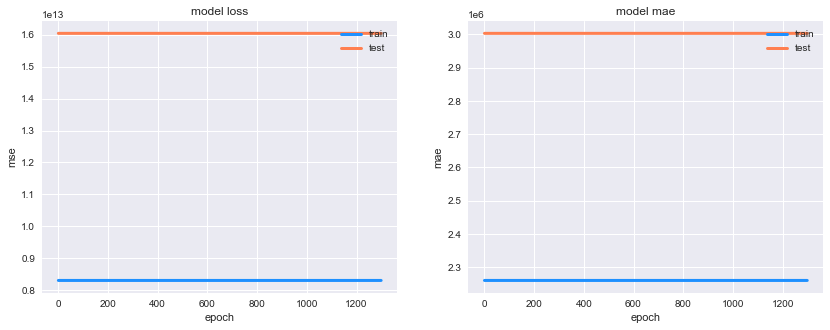

In [13]:
print(history.keys())

# 画出损失函数曲线
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(history['loss'], c='dodgerblue', lw=3)
plt.plot(history['val_loss'], c='coral', lw=3)
plt.title('model loss')
plt.ylabel('mse'); plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.subplot(122)
plt.plot(history['mae'], c='dodgerblue', lw=3)
plt.plot(history['val_mae'], c='coral', lw=3)
plt.title('model mae')
plt.ylabel('mae'); plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [6]:
# 读取模型
#print(len(X_train[4]))
autoencoder = load_model('gray_ae.h5')
#pred=autoencoder.predict(X_test[0].reshape(1,29))
#print(pred)
#print(X_test[0].shape)
# 利用训练好的autoencoder重建测试集
pred_test = autoencoder.predict(X_test)
pred_fraud = autoencoder.predict(X_fraud)

# 计算还原误差MSE和MAE
mse_test = np.mean(np.power(X_test - pred_test, 2), axis=1)
mse_fraud = np.mean(np.power(X_fraud - pred_fraud, 2), axis=1)
mae_test = np.mean(np.abs(X_test - pred_test), axis=1)
mae_fraud = np.mean(np.abs(X_fraud - pred_fraud), axis=1)
mse_df = pd.DataFrame()
mse_df['Class'] = [0] * len(mse_test) + [1] * len(mse_fraud)
mse_df['MSE'] = np.hstack([mse_test, mse_fraud])
mse_df['MAE'] = np.hstack([mae_test, mae_fraud])
mse_df = mse_df.sample(frac=1).reset_index(drop=True)


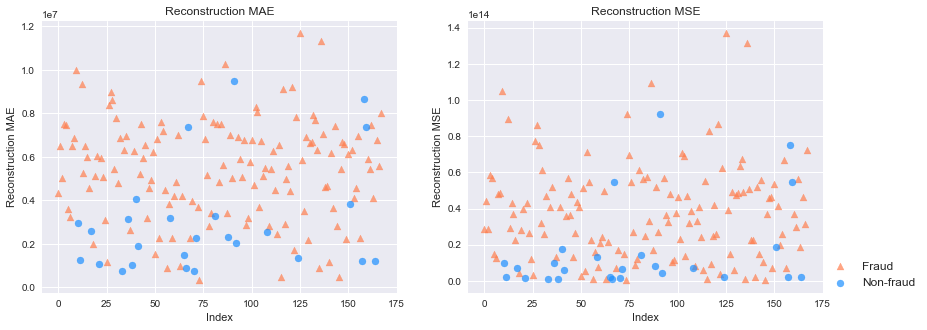

In [7]:
# 分别画出测试集中正样本和负样本的还原误差MAE和MSE
markers = ['o', '^']
markers = ['o', '^']
colors = ['dodgerblue', 'coral']
labels = ['Non-fraud', 'Fraud']

plt.figure(figsize=(14, 5))
plt.subplot(121)
for flag in [1, 0]:
    temp = mse_df[mse_df['Class'] == flag]
    plt.scatter(temp.index, 
                temp['MAE'],  
                alpha=0.7, 
                marker=markers[flag], 
                c=colors[flag], 
                label=labels[flag])
plt.title('Reconstruction MAE')
plt.ylabel('Reconstruction MAE'); plt.xlabel('Index')
plt.subplot(122)
for flag in [1, 0]:
    temp = mse_df[mse_df['Class'] == flag]
    plt.scatter(temp.index, 
                temp['MSE'],  
                alpha=0.7, 
                marker=markers[flag], 
                c=colors[flag], 
                label=labels[flag])
plt.legend(loc=[1, 0], fontsize=12); plt.title('Reconstruction MSE')
plt.ylabel('Reconstruction MSE'); plt.xlabel('Index')
plt.show()

In [8]:
test_df = pd.DataFrame({'Test MSE': mse_test})
anormaly_df = pd.DataFrame({"Anormaly MSE": mse_fraud})
sum_test=test_df.describe()
sum_test['Anormaly MSE']=anormaly_df.describe()['Anormaly MSE']
display(sum_test)
print(['MAE','MSE'])

,Test MSE,Anormaly MSE
count,2.600000e+01,1.420000e+02
mean,1.604412e+13,3.793110e+13
std,2.447384e+13,2.627159e+13
min,8.689810e+11,2.870204e+11
25%,2.264022e+12,1.707659e+13
50%,6.717175e+12,3.675762e+13
75%,1.410768e+13,5.187672e+13
max,9.211115e+13,1.368698e+14


['MAE', 'MSE']


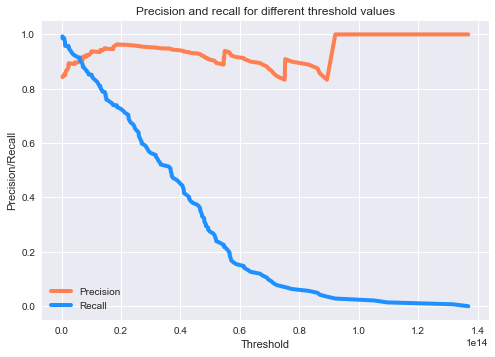

In [9]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(mse_df['Class'], mse_df['MSE'])

plt.plot(threshold_rt, precision_rt[1:], c='coral',label="Precision",linewidth=4)
plt.plot(threshold_rt, recall_rt[1:],c='dodgerblue', label="Recall",linewidth=4)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

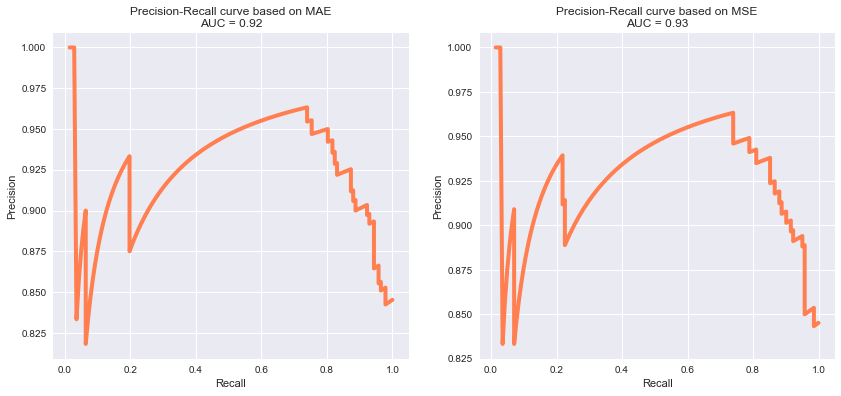

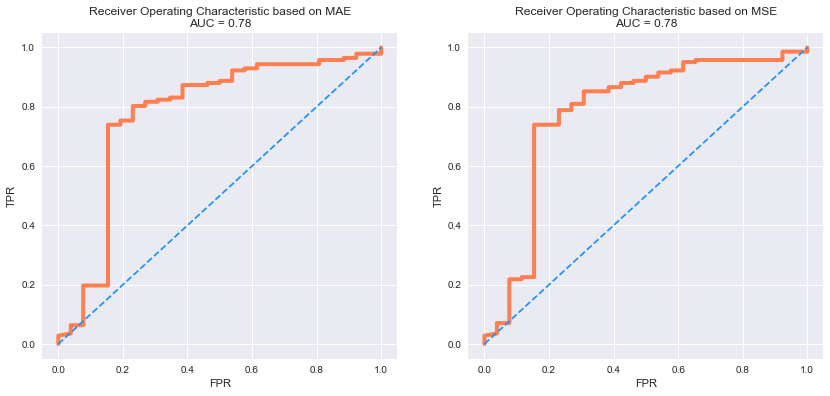

In [10]:
# 画出Precision-Recall曲线
plt.figure(figsize=(14, 6))
for i, metric in enumerate(['MAE', 'MSE']):
    plt.subplot(1, 2, i+1)
    precision, recall, _ = precision_recall_curve(mse_df['Class'], mse_df[metric])
    pr_auc = auc(recall, precision)
    plt.title('Precision-Recall curve based on %s\nAUC = %0.2f'%(metric, pr_auc))
    plt.plot(recall[:-2], precision[:-2], c='coral', lw=4)
    plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()

# 画出ROC曲线
plt.figure(figsize=(14, 6))
for i, metric in enumerate(['MAE', 'MSE']):
    plt.subplot(1, 2, i+1)
    fpr, tpr, _ = roc_curve(mse_df['Class'], mse_df[metric])
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic based on %s\nAUC = %0.2f'%(metric, roc_auc))
    plt.plot(fpr, tpr, c='coral', lw=4)
    plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
    plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

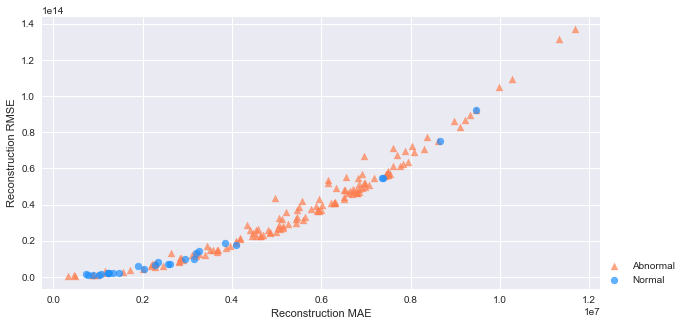

In [11]:
# 画出MSE、MAE散点图
markers = ['o', '^']
colors = ['dodgerblue', 'coral']
labels = ['Normal', 'Abnormal']

plt.figure(figsize=(10, 5))
for flag in [1, 0]:
    temp = mse_df[mse_df['Class'] == flag]
    plt.scatter(temp['MAE'], 
                temp['MSE'],  
                alpha=0.7, 
                marker=markers[flag], 
                c=colors[flag], 
                label=labels[flag])
plt.legend(loc=[1, 0])
plt.ylabel('Reconstruction RMSE'); plt.xlabel('Reconstruction MAE')
plt.show()

0.8452380952380952


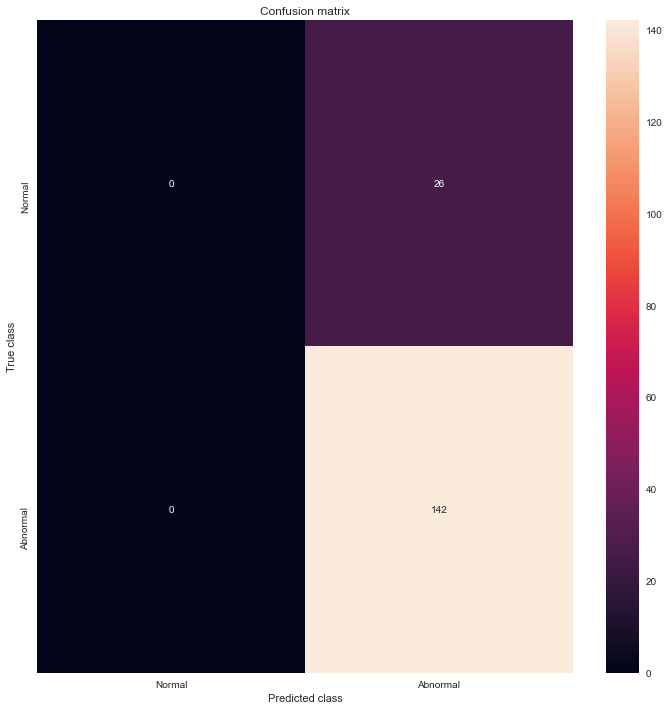

In [12]:
LABELS = ["Normal", "Abnormal"]
threshold_fixed = 0.031
pred_y = [1 if e > threshold_fixed else 0 for e in mse_df['MSE'].values]
conf_matrix = confusion_matrix(mse_df['Class'], pred_y)
accuracy=metrics.accuracy_score(mse_df['Class'],pred_y)

print(accuracy)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()